Solved V:
 [[   0.         1200.         1200.         ... 1200.
  1200.            0.        ]
 [   0.          600.          837.17950762 ...  837.17950762
   600.            0.        ]
 [   0.          362.82049238  600.         ...  600.
   362.82049238    0.        ]
 ...
 [   0.          362.82049238  600.         ...  600.
   362.82049238    0.        ]
 [   0.          600.          837.17950762 ...  837.17950762
   600.            0.        ]
 [   0.         1200.         1200.         ... 1200.
  1200.            0.        ]]


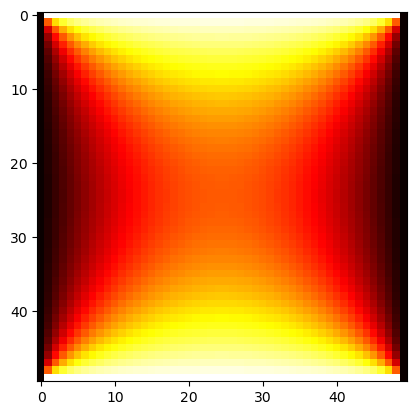

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Parameters
epsilon = 2
V_boundary = 1200
V_base = 0
grid_size = (50, 50)

# Create grid
nx, ny = grid_size
dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)

# Create finite element matrix and vector
A = sp.lil_matrix((nx * ny, nx * ny))
b = np.zeros(nx * ny)

# Apply boundary conditions function
def boundary_conditions(A, b, V_boundary, V_base, nx, ny):
    for i in range(nx):
        for j in range(ny):
            if i == 0 or i == nx - 1 or j == 0 or j == ny - 1:
                k = i + j * nx
                A[k, :] = 0
                A[k, k] = 1
                if i == 0 or i == nx - 1:
                    b[k] = V_base
                else:
                    b[k] = V_boundary
    return A, b

# Build finite element system
for i in range(1, nx - 1):
    for j in range(1, ny - 1):
        k = i + j * nx
        A[k, k] = -4
        A[k, k - 1] = 1
        A[k, k + 1] = 1
        A[k, k - nx] = 1
        A[k, k + nx] = 1

# Apply boundary conditions
A, b = boundary_conditions(A, b, V_boundary, V_base, nx, ny)

# Solve system
A = A.tocsc()
V = spla.spsolve(A, b)

# Reshape solution vector into 2D matrix
V = V.reshape((ny, nx))

print("Solved V:\n", V)

import matplotlib.pyplot as plt

plt.imshow(V, cmap='hot', interpolation='nearest')
plt.savefig("heatmap.jpg")

plt.show()

